In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [2]:
dataframe=pd.read_csv('insaurance_sell.csv',nrows=10000)
dataframe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


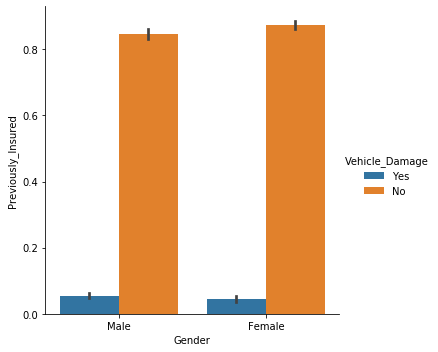

In [3]:
import seaborn as sns
sns.catplot(x='Gender',y='Previously_Insured',kind='bar',data=dataframe,hue='Vehicle_Damage')

In [4]:
df=pd.read_csv('insaurance_sell.csv',nrows=100)

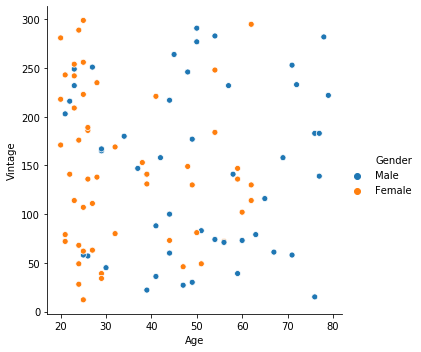

In [5]:
sns.relplot(x='Age',y='Vintage',data=df,hue='Gender')

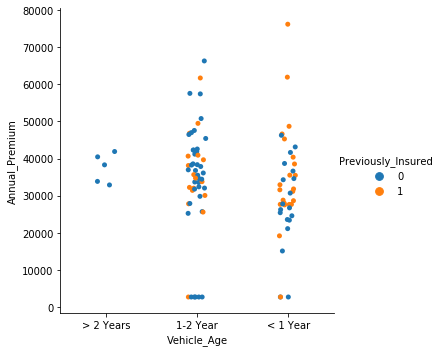

In [6]:
sns.catplot(x='Vehicle_Age',y="Annual_Premium",data=df,hue='Previously_Insured')

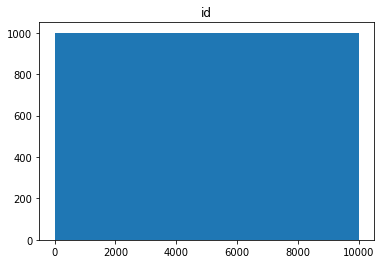

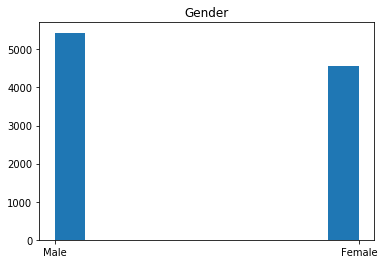

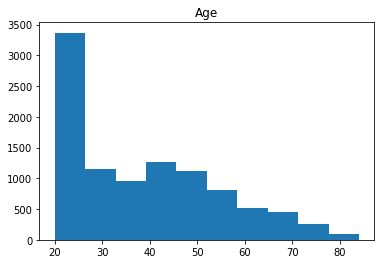

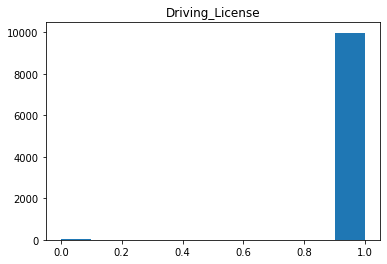

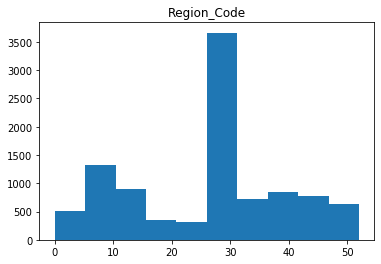

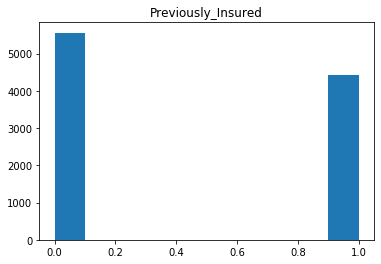

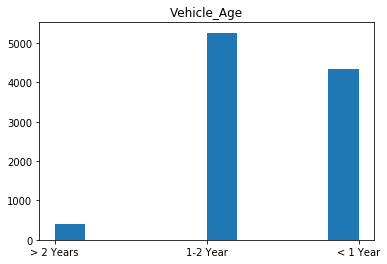

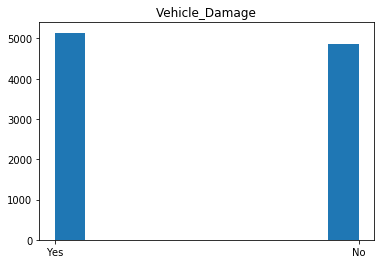

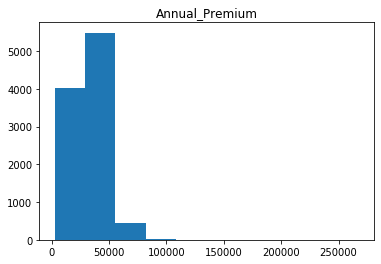

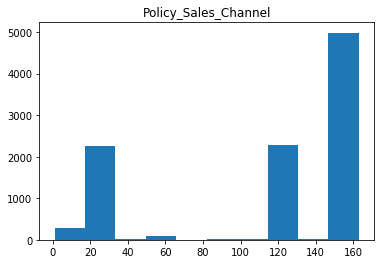

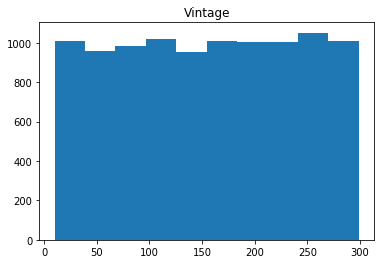

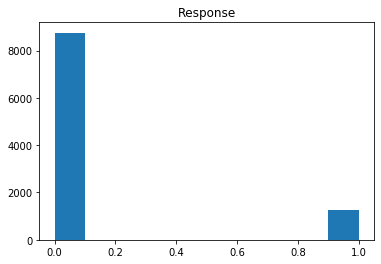

In [7]:
for i in dataframe.columns:
    plt.hist(dataframe[i])
    plt.title(i)
    plt.show()

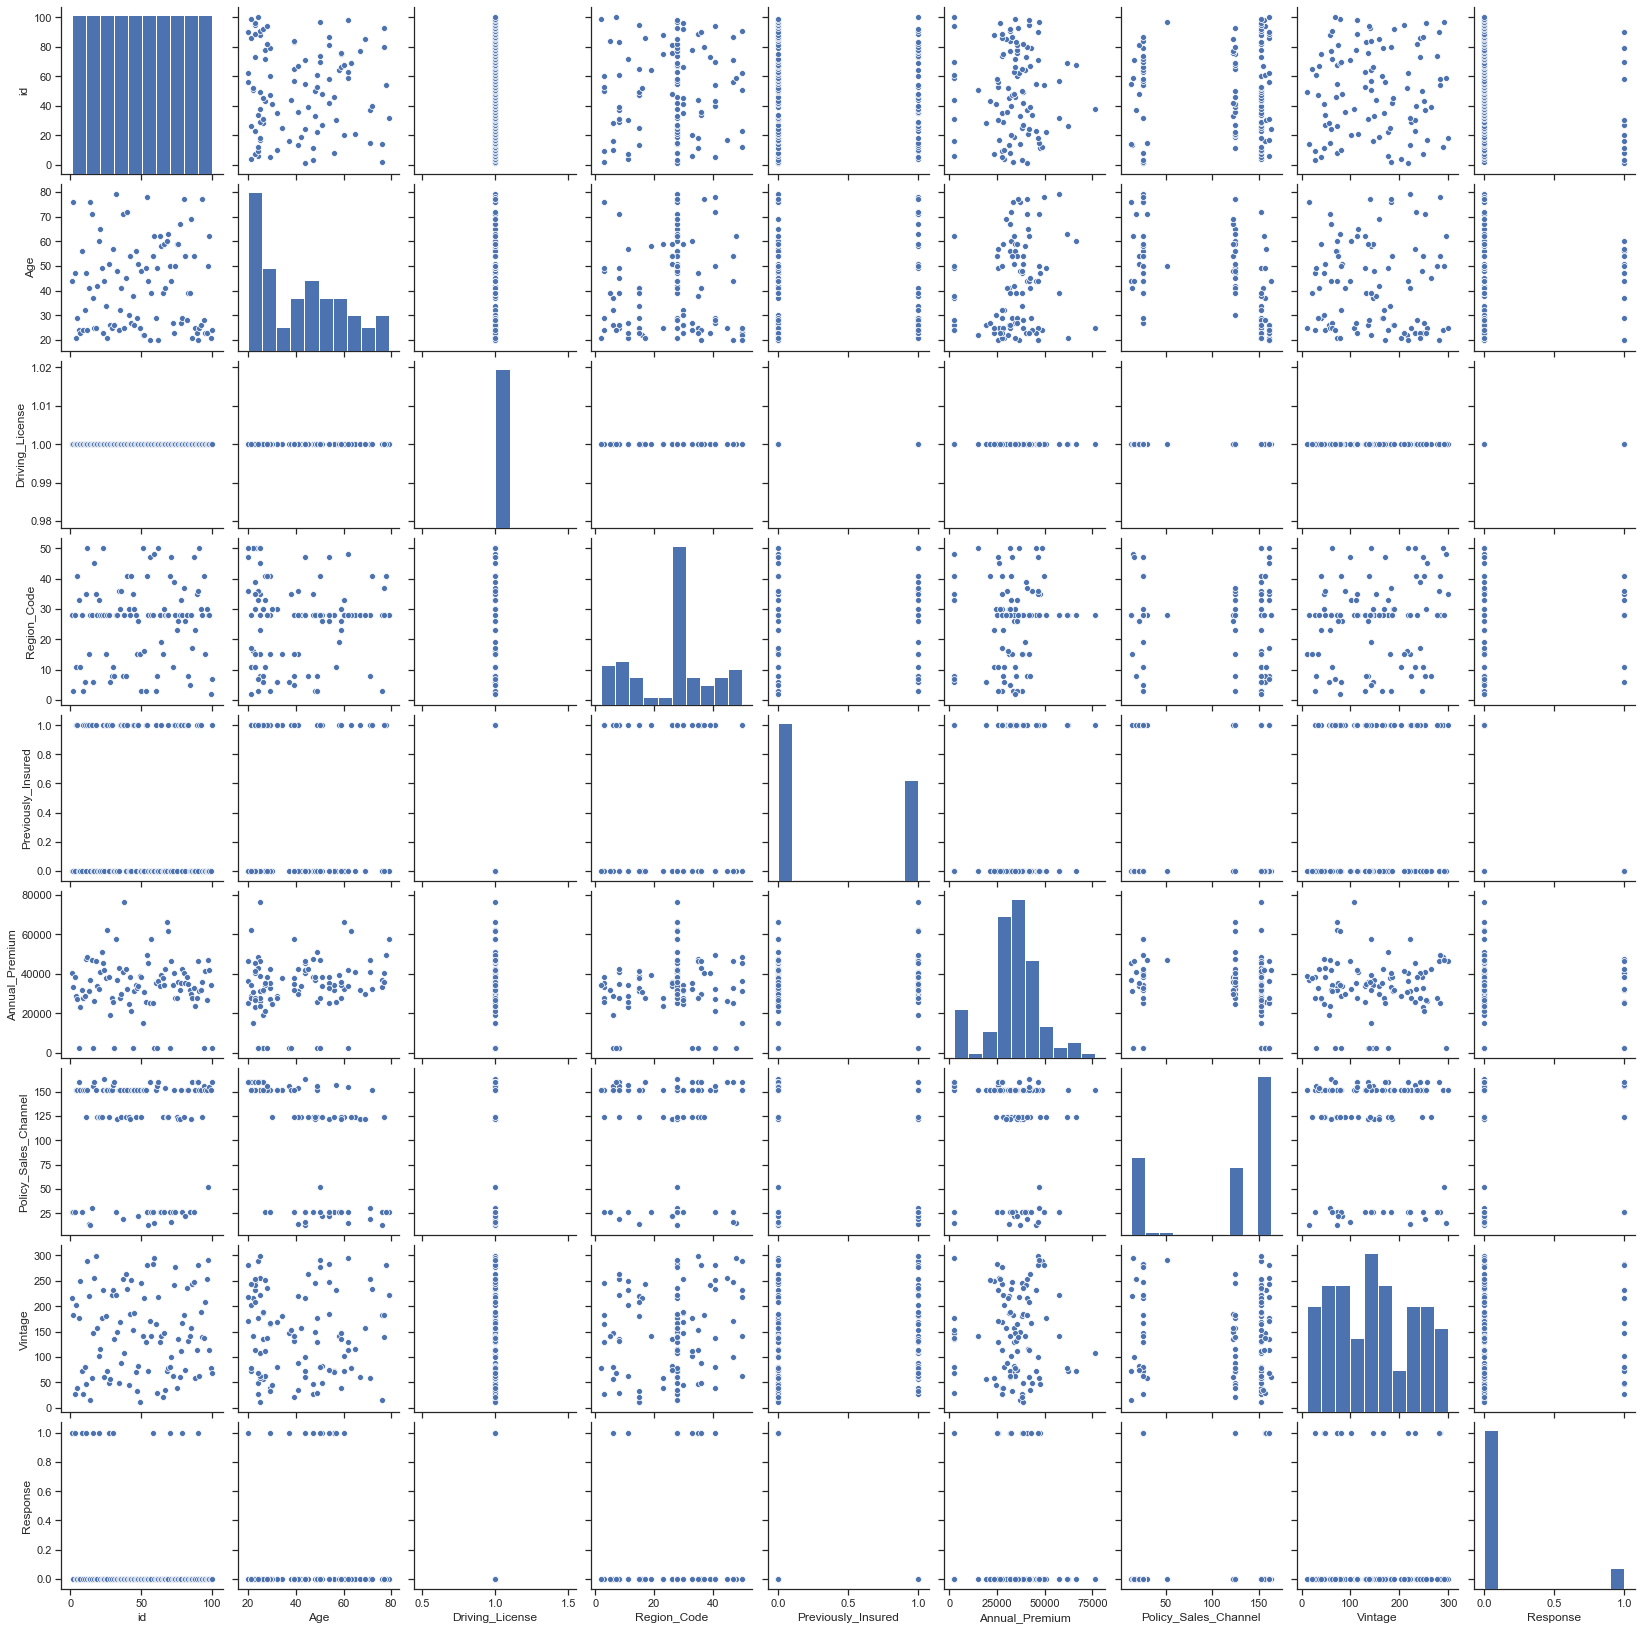

In [8]:
sns.set(style='ticks')

sns.pairplot(data=df)

In [9]:
dataframe.shape

(10000, 12)

In [10]:
gender=pd.get_dummies(dataframe['Gender'],drop_first=True)
dataframe['vehicle_damage']=pd.get_dummies(dataframe['Vehicle_Damage'],drop_first=True)

In [11]:
dataframe=pd.concat([dataframe,gender],axis=1)
dataframe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_damage,Male
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0


In [12]:
dataframe.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
vehicle_damage          0
Male                    0
dtype: int64

In [13]:
dataframe['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [14]:
def classification(x):
    if x=='> 2 Years' :
        return 2
    elif x=='1-2 Year':
        return 1
    else:
        return 0

In [15]:
df=pd.DataFrame(dataframe['Vehicle_Age'].apply(classification))
df.head()

,Vehicle_Age
0,2
1,1
2,2
3,0
4,0


In [16]:
pd.concat([dataframe,df],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_damage,Male,Vehicle_Age
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,1,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,1,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0,0,0,0
9996,9997,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0,0,1,0
9997,9998,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0,1,0,0
9998,9999,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0,0,0,0


In [17]:
dataframe.drop(['Gender','id','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [18]:
#dataframe.columns['Yes'] = 'Previously_damaged'

In [19]:
from sklearn.model_selection import train_test_split
x=dataframe.drop(labels=['Response'],axis=1)
y=dataframe['Response']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =10)

In [20]:
x_train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,vehicle_damage,Male
7496,25,1,23.0,1,28015.0,152.0,289,0,0
7694,22,1,28.0,1,28495.0,152.0,68,0,0
9248,75,1,28.0,0,38031.0,124.0,137,1,1
2470,35,1,28.0,0,29775.0,124.0,75,1,0
4392,29,1,11.0,1,33748.0,152.0,84,0,1
...,...,...,...,...,...,...,...,...,...
9372,20,1,2.0,1,29543.0,160.0,248,0,1
7291,37,1,28.0,1,42197.0,152.0,21,0,1
1344,27,1,35.0,0,33230.0,163.0,240,1,1
7293,23,1,6.0,1,19578.0,152.0,104,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier()

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rfc.score(x_test,y_test)


0.8665

In [25]:
y_predicted=rfc.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1710,   43],
       [ 224,   23]], dtype=int64)

Text(21.5, 0.5, 'Truth')

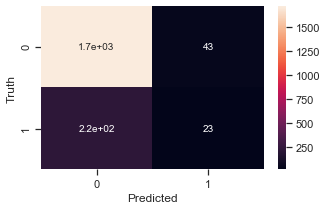

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')